## Clustering


In [ ]:
# Remove attr flag from data

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = pd.read_csv('../2_data cleaning/Cleaned_data.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,0,3,1,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,40,1,4,2,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
2,44,0,2,1,36,3,1,2,4010.0,1247,...,0,1,0,0,0,0,1,0,0,0
3,51,0,4,1,46,6,1,3,34516.0,2264,...,1,0,0,0,0,0,0,1,0,0
4,32,0,0,2,27,2,2,2,29081.0,1396,...,0,0,1,0,0,0,0,0,0,1


In [2]:
# Select columns for KMeans model
data = data[['Attrition_Flag','Customer_Age','Gender','Dependent_count','Marital_Status','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon']]
data.shape

KeyError: "['Attrition_Flag'] not in index"

Error in callback <function _draw_all_if_interactive at 0x000001761A20D440> (for post_execute):


KeyboardInterrupt: 

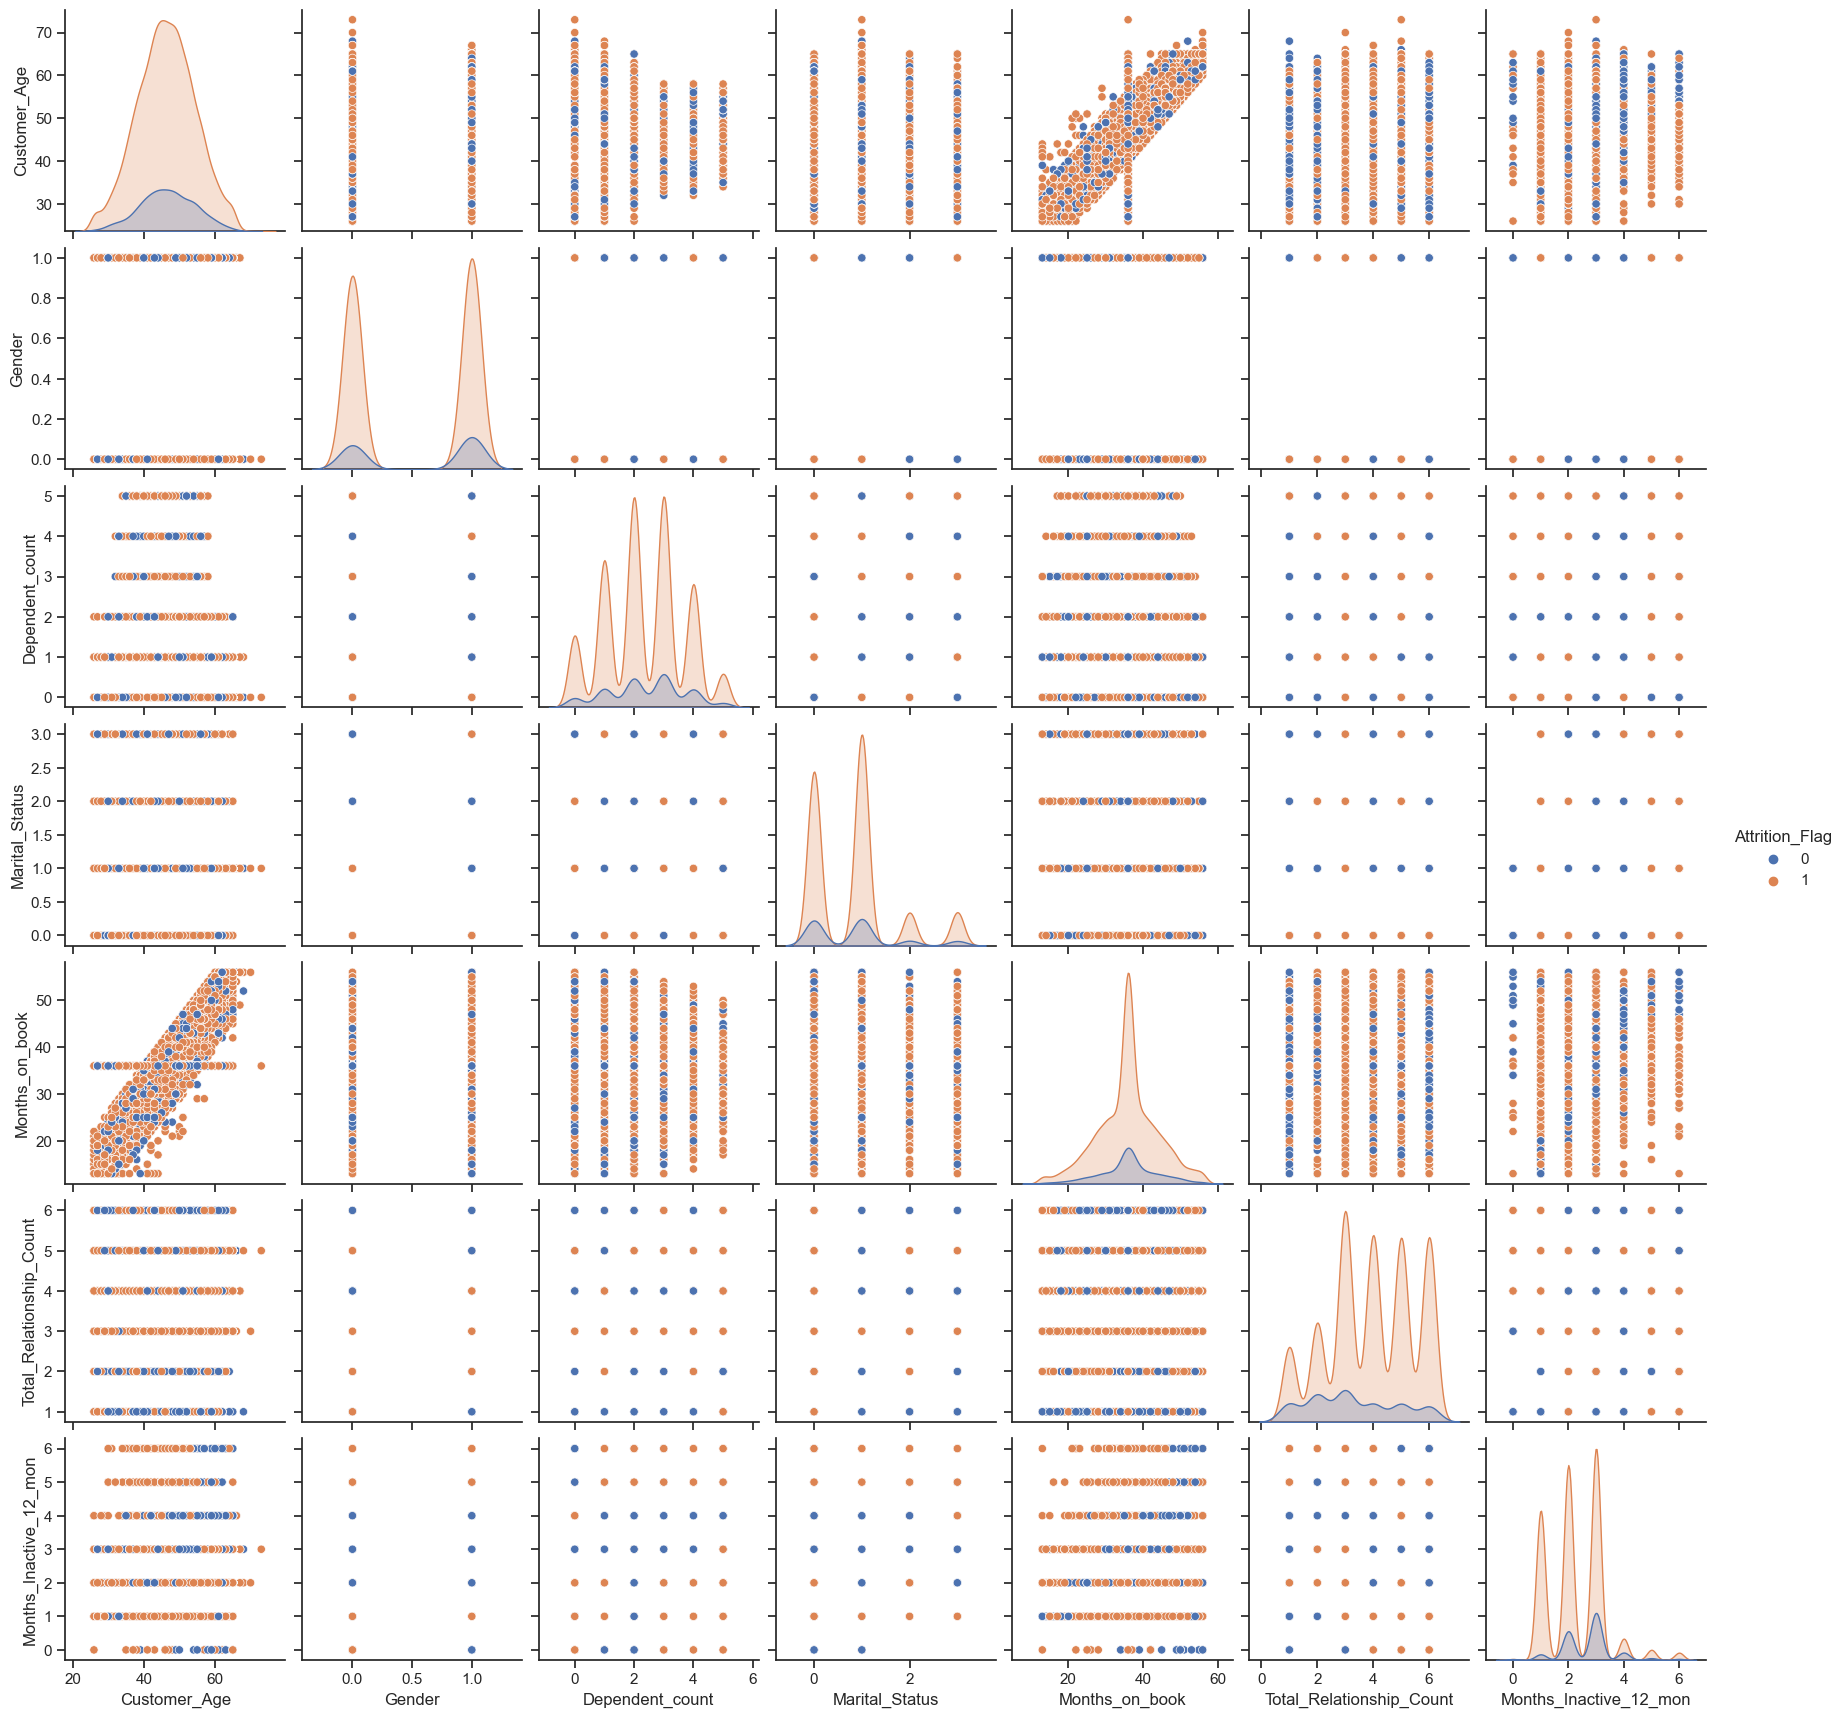

In [17]:
# visualise your clusters here (take a look at the pandas scatter_matrix or seaborn's pairplot method)
# sns.set_theme(style="ticks")
# sns.pairplot(data, hue='Attrition_Flag')

In [19]:
# Drop columns irrelevant for clustering

columns_names = data.columns
columns_names

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Marital_Status', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon'],
      dtype='object')

In [26]:
# Define number of clusters
cluster_size = 4

# Z-score Normalisation with Standard Scaler from SKlearn: returns an nparray
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(data)
data_scaled = scaler.transform(data)

# Cluster data and create labels
kmeans = KMeans(n_clusters=cluster_size, init='k-means++')
kmeans.fit(data_scaled)

# Build again a df with standardized datas and columns names
data_scaled_df = pd.DataFrame(data = data_scaled,
                                columns = columns_names)

# Build a pd series from labels and give a column name
cluster_labels = pd.Series(kmeans.labels_, name='cluster')

# # Build a pd series with the names from original pokemon df
# pokemon_names = pd.Series(data['name'], name='name')

# Concat Scaled and cluster labelled for Pokemon selection
data_scaled_labelled_df = pd.concat([data_scaled_df, cluster_labels], axis=1)

# # Concat the cluster label series and names series to scaled df
# pokemon_scaled_labelled_named_df = pd.concat([pokemon_scaled_df, cluster_labels, pokemon_names], axis=1)

data_scaled_labelled_df.head()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,cluster
0,0.437784,-0.165088,-1.060796,0.503682,0.195793,0.384899,0.764115,-1.328025,2
1,0.437784,-0.788935,0.942688,1.273948,1.365002,-0.241281,-0.522668,1.643060,0
2,0.437784,-0.289858,-1.060796,-0.266584,0.195793,0.009191,-0.522668,-1.328025,2
3,0.437784,0.583529,-1.060796,1.273948,0.195793,1.261552,1.407507,-1.328025,2
4,0.437784,-1.787091,-1.060796,-1.807115,1.365002,-1.117933,-1.166060,-0.337663,2


In [28]:
cluster_center =  kmeans.cluster_centers_
centroid_df = pd.DataFrame(cluster_center, columns=columns_names)
centroid_df.T

,0,1,2,3
Attrition_Flag,0.437784,0.387289,0.437784,-2.284231
Customer_Age,-0.427931,1.180840,-0.448979,-0.010604
Gender,0.942688,0.017870,-1.060796,0.087125
Dependent_count,0.264750,-0.721831,0.229190,0.086191
Marital_Status,0.050648,-0.172422,0.082406,-0.006584
Months_on_book,-0.395652,1.088609,-0.405115,-0.024194
Total_Relationship_Count,0.022947,0.129050,0.060252,-0.349932
Months_Inactive_12_mon,-0.069789,-0.034317,-0.086044,0.354902


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

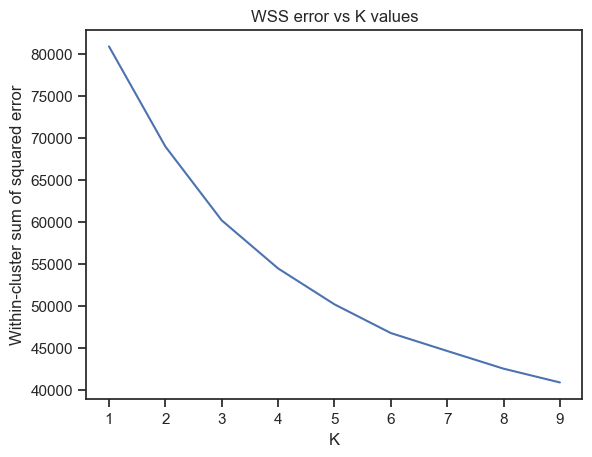

In [30]:
# Optimal k
# Elbow & Silhouette Score 
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt

# WSS error is the Within-cluster sum of squared error
wss = []
#deciding k range-here the dataset has few rows thats why i am taking k range (1,10)
k_rng = range(1,10)
#perform iterations
for k in k_rng:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    
    # Elbow
    kmeans.fit(data_scaled)
    wss.append(kmeans.inertia_)
    
    # Silhouette
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print(f"For n_clusters = {k}\nThe average silhouette_score is :{silhouette_avg}")





plt.xlabel('K')
plt.ylabel('Within-cluster sum of squared error')
plt.title('WSS error vs K values')
plt.plot(k_rng,wss)



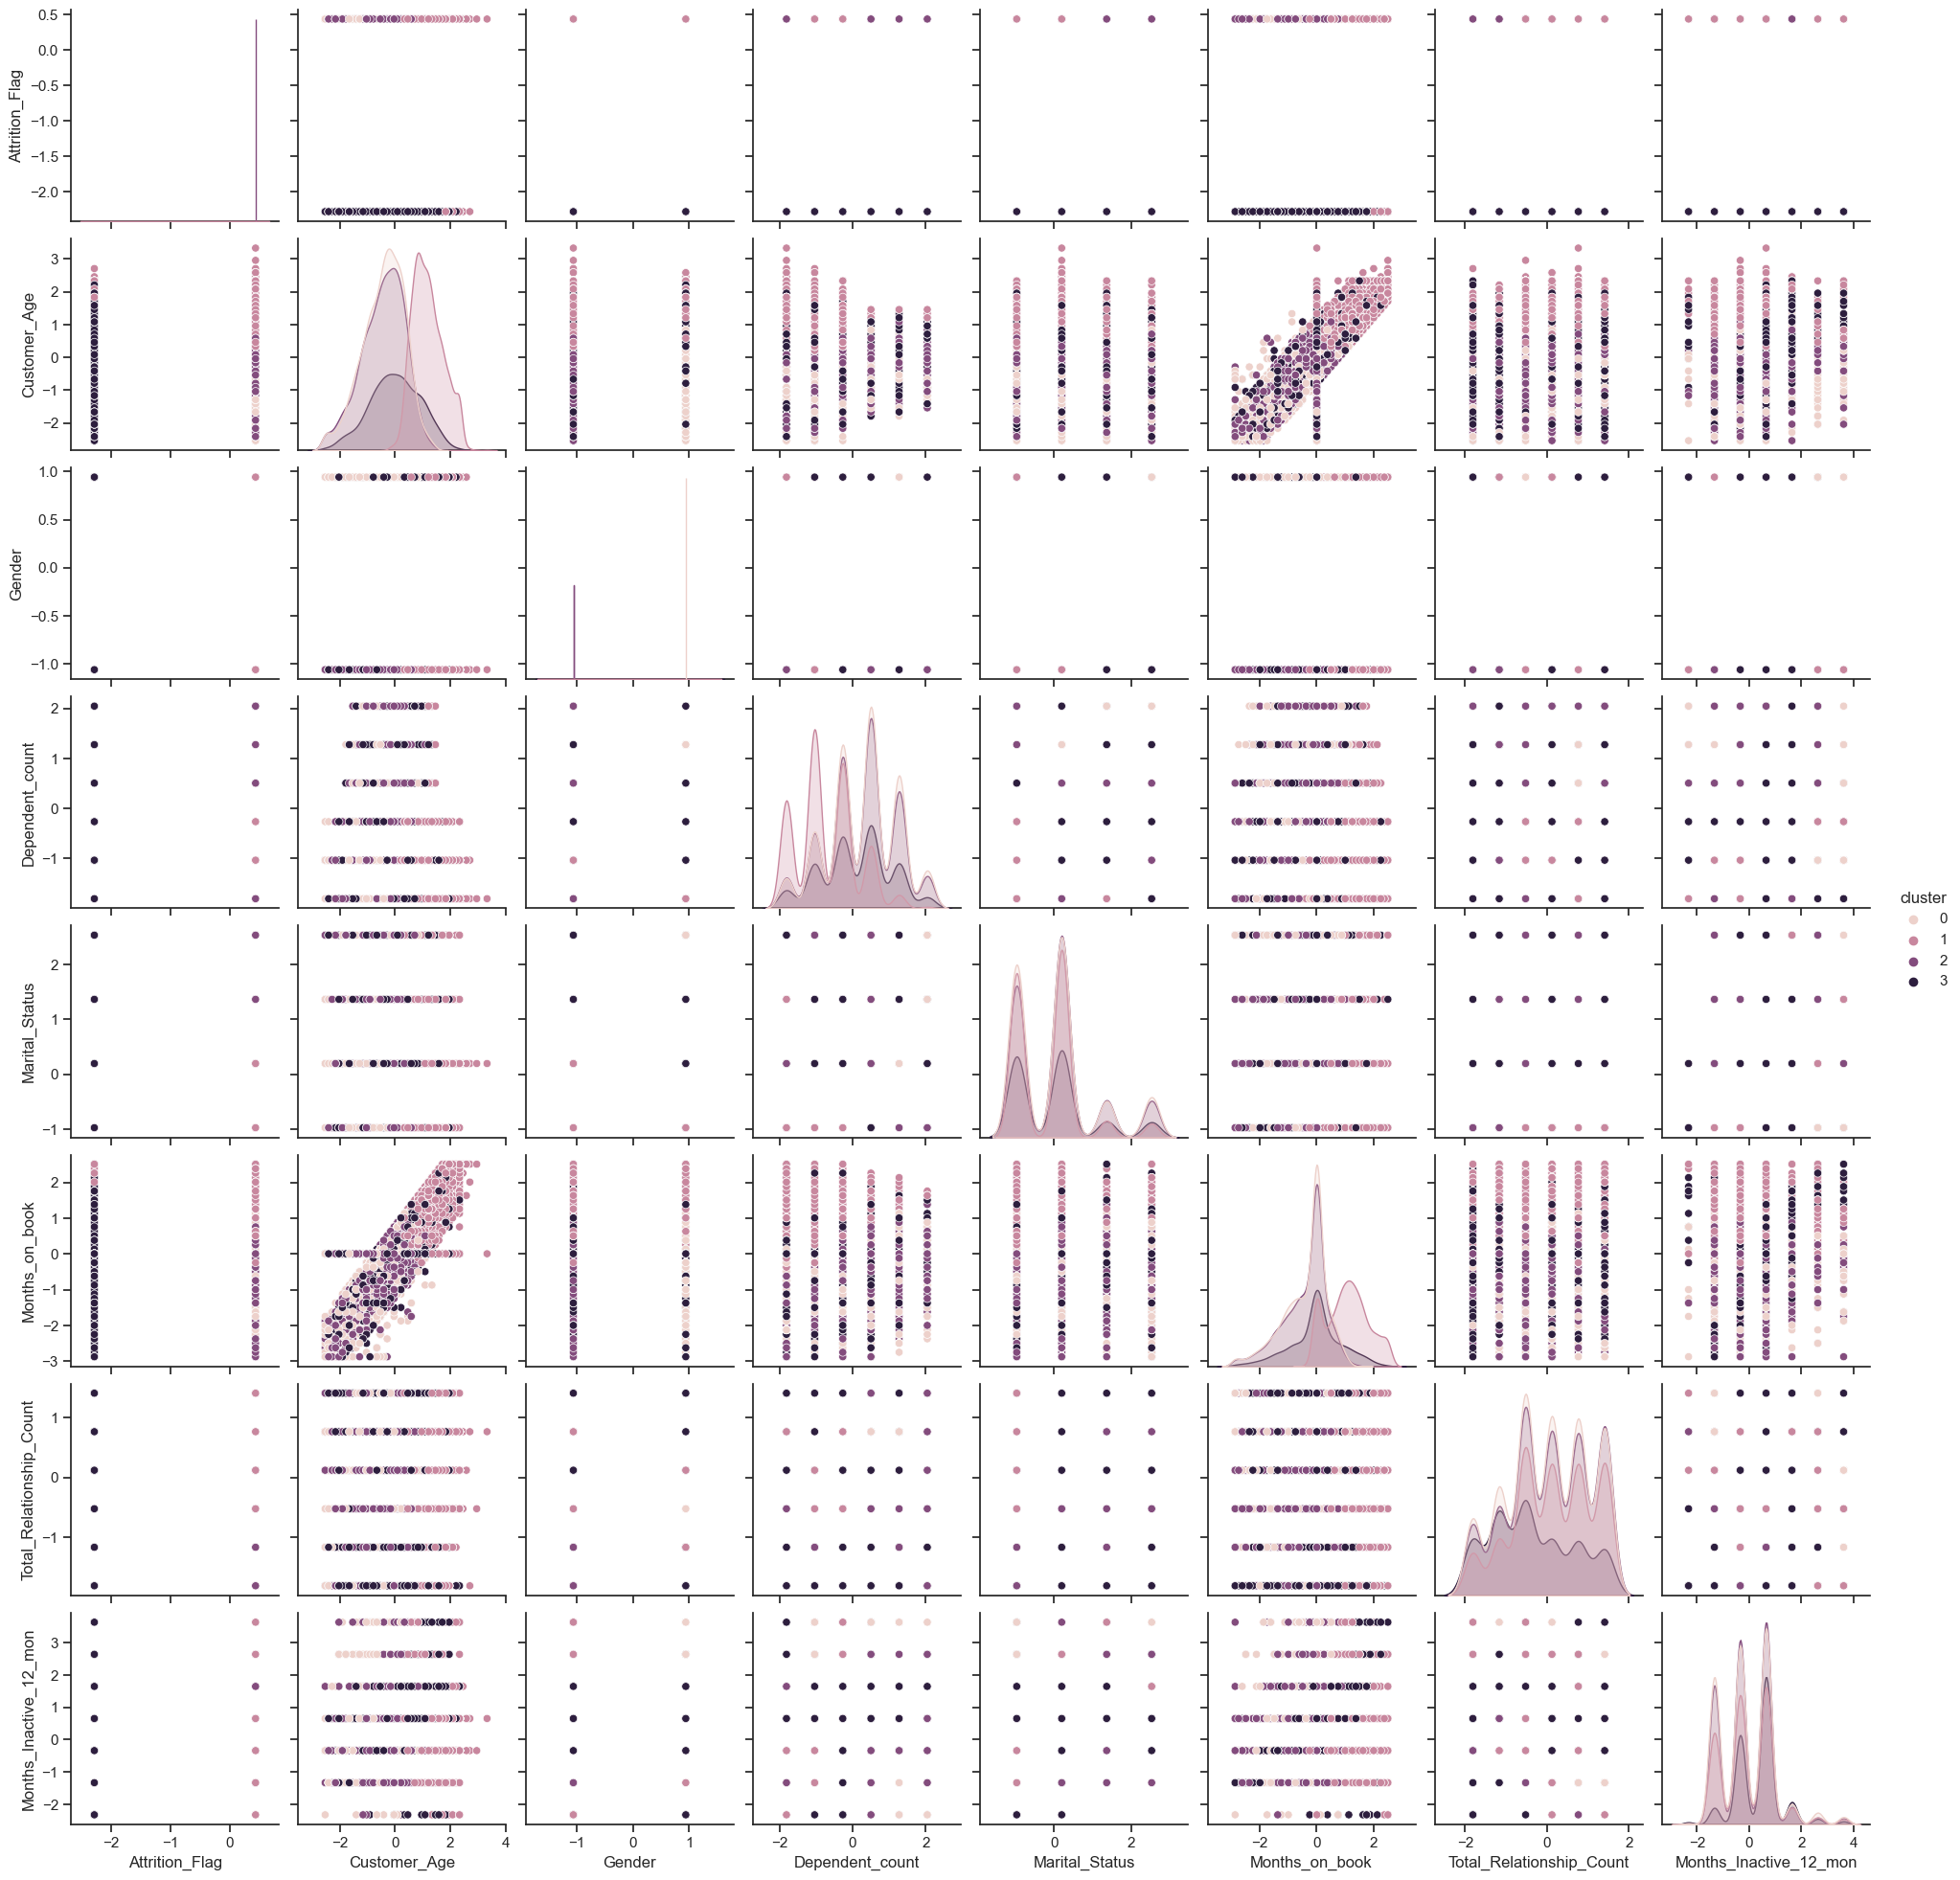

In [ ]:
# visualise Clustering using seaborn

# sns.set_theme(style="ticks")
# sns.pairplot(data_scaled_labelled_df, hue="cluster")